In [146]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes='True')
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [147]:
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [148]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
data.head(1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [149]:
data.isna().sum() * 100 /len(data)

data.duplicated().sum() 
data.drop_duplicates(subset=None, keep='first', ignore_index=False, inplace=True)
data.duplicated().sum() 

0

In [150]:
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_val =  ['age','trestbps','chol','thalach','oldpeak' ]
x = data.drop(columns=['target'])
y = data.target 

orig_sex_val = data.sex

In [151]:
col_pip = ColumnTransformer([ 
    ('num', StandardScaler(), num_val), ('cat', OrdinalEncoder(), cat_val)
])

x = pd.DataFrame(col_pip.fit_transform(x))
x.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,3.0,0.0,0.0,0.0,0.0,1.0


In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [153]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)



LogisticRegression()

In [154]:
y_pred = logreg.predict(x_test)

accu_scr = accuracy_score(y_test, y_pred).round(3)

accu_scr_per = pd.DataFrame([ 
    'LogisticRegression', accu_scr
]).transpose()
accu_scr_per.columns = ['Method', 'Logistic Reg Accuracy Test Score']
accu_scr_per

,Method,Logistic Reg Accuracy Test Score
0,LogisticRegression,0.824


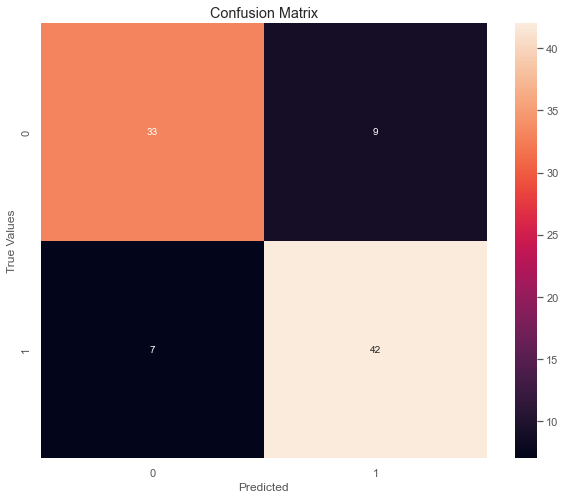

In [155]:
cm_dic = { 
    'y_test':y_test,
    'y_pred':y_pred
}
cm_cols = pd.DataFrame(cm_dic, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(cm_cols['y_test'], cm_cols['y_pred'], rownames=['True Values'], colnames=['Predicted'])

f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Confusion Matrix')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'KNN Accuracy Line Plot'}>

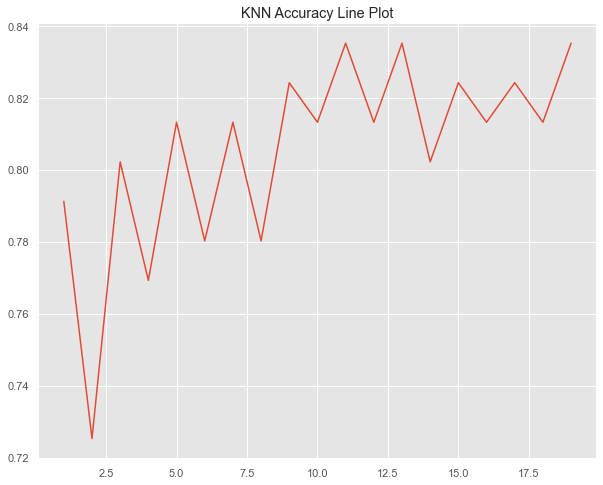

In [158]:
accuracies = []

for N in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=N)

    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_test,y_pred)
    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax = plt.subplots(figsize=(10,8))
ax.set_title('KNN Accuracy Line Plot')

sns.lineplot(np.arange(1,20),accuracies)

In [162]:
best_k = 1+ np.argmax(accuracies)
best_accuracy = np.max(accuracies).round(3)

knn_per = pd.DataFrame([ 
    'KNeighborsClassifier', best_k, best_accuracy
]).transpose()
knn_per.columns = ['Method', 'Best K', 'Best Accuracy']
knn_per

,Method,Best K,Best Accuracy
0,KNeighborsClassifier,11,0.835
